In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_excel('E-com_Data.xlsx')
dataset.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   InvoieNo           537979 non-null  int64         
 3   Date of purchase   537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  int64         
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    float64       
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 49.3+ MB


In [4]:
dataset.isnull().sum()/len(dataset)*100

CustomerID            24.869000
Item Code              0.000000
InvoieNo               0.000000
Date of purchase       0.000000
Quantity               0.000000
Time                   0.000000
price per Unit         0.000000
Price                  0.000000
Shipping Location      0.000000
Cancelled_status      98.448824
Reason of return      99.999442
Sold as set          100.000000
dtype: float64

In [5]:
dataset['CustomerID'].value_counts()

4043.0    7971
1896.0    5874
1301.0    5099
331.0     4615
1675.0    2779
          ... 
2198.0       1
3209.0       1
2251.0       1
3127.0       1
3244.0       1
Name: CustomerID, Length: 4349, dtype: int64

In [6]:
dataset.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        3479
Price                16327
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

In [7]:
dataset.head(20)

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN
5,4349.0,14618,397122,2017-10-27,1,12:43:00,256.0,256.0,Location 1,NaN,NaN,NaN
6,4343.0,15364,368432,2017-02-13,-4,14:46:00,922.0,-3688.0,Location 1,1.0,NaN,NaN
7,4341.0,85014B,377109,2017-05-14,3,09:22:00,677.0,2031.0,Location 1,NaN,NaN,NaN
8,4341.0,85014A,377109,2017-05-12,3,09:22:00,692.0,2076.0,Location 1,NaN,NaN,NaN
9,4341.0,85014B,390217,2017-09-07,6,14:47:00,670.0,4020.0,Location 1,NaN,NaN,NaN


In [8]:
dataset.duplicated().sum()

9

In [9]:
dataset.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [10]:
dataset = dataset.rename(columns = {'InvoieNo':'InvoiceNo', 'Date of purchase':'Date'})

In [11]:
dataset.loc[dataset.duplicated(),:]

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
61202,4043.0,15819,403353,2017-12-02,1,14:07:00,447.0,447.0,Location 36,NaN,NaN,NaN
70587,3984.0,15422,405579,2017-12-09,24,14:09:00,77.0,1848.0,Location 36,NaN,NaN,NaN
84823,3828.0,14519,398139,2017-10-31,1,14:04:00,85.0,85.0,Location 36,NaN,NaN,NaN
120521,3384.0,15121,380588,2017-06-11,1,11:37:00,298.0,298.0,Location 36,NaN,NaN,NaN
182786,2607.0,15660,393225,2017-09-30,1,12:31:00,484.0,484.0,Location 36,NaN,NaN,NaN
248215,1852.0,15614,382863,2017-07-02,12,09:53:00,221.0,2652.0,Location 36,NaN,NaN,NaN
310310,1291.0,13958,368695,2017-02-14,2,16:17:00,298.0,596.0,Location 36,NaN,NaN,NaN
325175,1076.0,2020,405755,2017-12-13,12,15:48:00,58.0,696.0,Location 36,NaN,NaN,NaN
414854,NaN,2020,386281,2017-07-31,1,17:09:00,104.0,104.0,Location 36,NaN,NaN,NaN


In [12]:
dataset = dataset.drop_duplicates(ignore_index=True)

In [13]:
dataset.head()

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN


In [14]:
dataset.duplicated().sum()

0

In [15]:
dataset.isnull().sum()

CustomerID           133789
Item Code                 0
InvoiceNo                 0
Date                      0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     529625
Reason of return     537967
Sold as set          537970
dtype: int64

In [16]:
dataset = dataset.dropna(subset=['CustomerID'])

In [17]:
dataset = dataset.iloc[:,0:9]

In [18]:
dataset.isnull().sum()

CustomerID           0
Item Code            0
InvoiceNo            0
Date                 0
Quantity             0
Time                 0
price per Unit       0
Price                0
Shipping Location    0
dtype: int64

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404181 entries, 0 to 537940
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404181 non-null  float64       
 1   Item Code          404181 non-null  object        
 2   InvoiceNo          404181 non-null  int64         
 3   Date               404181 non-null  datetime64[ns]
 4   Quantity           404181 non-null  int64         
 5   Time               404181 non-null  object        
 6   price per Unit     404181 non-null  float64       
 7   Price              404181 non-null  float64       
 8   Shipping Location  404181 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 30.8+ MB


In [20]:
dataset['Date_1'] = dataset['Date']

In [21]:
dataset.head()

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Date_1
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,2017-10-29
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,2017-10-05
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,2017-10-12
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,2017-08-22
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,2017-10-10


In [22]:
# Recency = Latest Date - Last invoice date
# Frequency = count of customerid / invoice number / date of purchase by customers
# Monetry = Sum of Total Price by idividual customer

import datetime as dt

In [23]:
dataset['Date'].describe()

count                  404181
unique                    381
top       2017-11-24 00:00:00
freq                     2522
first     2016-12-02 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [24]:
#first     2016-12-02 00:00:00
#last      2017-12-19 00:00:00
Latest_Date = dt.datetime(2017,12,20)

RFMScores = dataset.groupby('CustomerID').agg({'Date_1': lambda x: (Latest_Date - x.max()).days,
                                              'Date': lambda x: x.nunique(),
                                              'Price': lambda x: x.sum()})

RFMScores['Date'] = RFMScores['Date'].astype(int)
RFMScores.rename(columns = {'Date_1':'Recency', 'Date':'Frequency', 'Price':'Monetory'},inplace=True)



In [25]:
RFMScores

,Recency,Frequency,Monetory
CustomerID,,,
2.0,4,63,553704.0
3.0,77,18,257404.0
4.0,19,10,176613.0
5.0,311,7,41976.0
6.0,37,42,151822.0
...,...,...,...
4368.0,278,7,20480.0
4369.0,181,6,10774.0
4370.0,9,11,24962.0


In [26]:
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetory
0,2.0,4,63,553704.0
1,3.0,77,18,257404.0
2,4.0,19,10,176613.0
3,5.0,311,7,41976.0
4,6.0,37,42,151822.0


In [27]:
RFMScores.Recency.describe()

count    4349.000000
mean       93.299379
std       100.701315
min         1.000000
25%        18.000000
50%        51.000000
75%       144.000000
max       381.000000
Name: Recency, dtype: float64

In [28]:
RFMScores.Frequency.describe()

count    4349.000000
mean       27.396643
std        33.594882
min         1.000000
25%         9.000000
50%        16.000000
75%        33.000000
max       378.000000
Name: Frequency, dtype: float64

In [29]:
RFMScores.Monetory.describe()

count    4.349000e+03
mean     2.299380e+05
std      8.572589e+05
min     -5.037200e+04
25%      3.814800e+04
50%      8.365500e+04
75%      2.056120e+05
max      3.553619e+07
Name: Monetory, dtype: float64

In [30]:
# Split into four segment using quantiles method
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 9.0, 0.5: 16.0, 0.75: 33.0},
 'Monetory': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [31]:
def RScoring(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <=d[p][0.25]:
        return 4
    elif x <=d[p][0.5]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

In [32]:
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetory'].apply(FnMScoring, args=('Monetory',quantiles,))

In [33]:
RFMScores.head()

,Recency,Frequency,Monetory,R,F,M
CustomerID,,,,,,
2.0,4,63,553704.0,1,1,1
3.0,77,18,257404.0,3,2,1
4.0,19,10,176613.0,2,3,2
5.0,311,7,41976.0,4,4,3
6.0,37,42,151822.0,2,1,2


In [34]:
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetory,R,F,M
0,2.0,4,63,553704.0,1,1,1
1,3.0,77,18,257404.0,3,2,1
2,4.0,19,10,176613.0,2,3,2
3,5.0,311,7,41976.0,4,4,3
4,6.0,37,42,151822.0,2,1,2


In [35]:
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)
RFMScores['RFMScore'] = RFMScores[['R','F','M']].sum(axis=1)
RFMScores.head(10)

,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
2.0,4,63,553704.0,1,1,1,111,3
3.0,77,18,257404.0,3,2,1,321,6
4.0,19,10,176613.0,2,3,2,232,7
5.0,311,7,41976.0,4,4,3,443,11
6.0,37,42,151822.0,2,1,2,212,5
7.0,208,4,9410.0,4,4,4,444,12
8.0,233,10,135550.0,4,3,2,432,9
9.0,215,7,65832.0,4,4,3,443,11
10.0,25,22,331601.0,2,2,1,221,5


In [36]:
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMScore
0,2.0,4,63,553704.0,1,1,1,111,3
1,3.0,77,18,257404.0,3,2,1,321,6
2,4.0,19,10,176613.0,2,3,2,232,7
3,5.0,311,7,41976.0,4,4,3,443,11
4,6.0,37,42,151822.0,2,1,2,212,5


In [37]:
#RFMScores.to_csv('manual_approach.csv')

In [38]:
Loyality_Lavel = ['Diamond','Gold','Platinum','Silver']
score_cuts = pd.qcut(RFMScores.RFMScore, q=4, labels=Loyality_Lavel)
RFMScores['Loyality_Lavel'] = score_cuts.values
RFMScores = RFMScores.reset_index()
RFMScores

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMScore,Loyality_Lavel
0,2.0,4,63,553704.0,1,1,1,111,3,Diamond
1,3.0,77,18,257404.0,3,2,1,321,6,Gold
2,4.0,19,10,176613.0,2,3,2,232,7,Gold
3,5.0,311,7,41976.0,4,4,3,443,11,Silver
4,6.0,37,42,151822.0,2,1,2,212,5,Diamond
...,...,...,...,...,...,...,...,...,...,...
4344,4368.0,278,7,20480.0,4,4,4,444,12,Silver
4345,4369.0,181,6,10774.0,4,4,4,444,12,Silver
4346,4370.0,9,11,24962.0,1,3,4,134,8,Gold
4347,4371.0,4,132,280608.0,1,1,1,111,3,Diamond


In [39]:
RFMScores.head(20)

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMScore,Loyality_Lavel
0,2.0,4,63,553704.0,1,1,1,111,3,Diamond
1,3.0,77,18,257404.0,3,2,1,321,6,Gold
2,4.0,19,10,176613.0,2,3,2,232,7,Gold
3,5.0,311,7,41976.0,4,4,3,443,11,Silver
4,6.0,37,42,151822.0,2,1,2,212,5,Diamond
5,7.0,208,4,9410.0,4,4,4,444,12,Silver
6,8.0,233,10,135550.0,4,3,2,432,9,Platinum
7,9.0,215,7,65832.0,4,4,3,443,11,Silver
8,10.0,25,22,331601.0,2,2,1,221,5,Diamond
9,11.0,34,10,771439.0,2,3,1,231,6,Gold


In [40]:
RFMScores1 = RFMScores.iloc[:,1:4]
RFMScores1.head()

,Recency,Frequency,Monetory
0,4,63,553704.0
1,77,18,257404.0
2,19,10,176613.0
3,311,7,41976.0
4,37,42,151822.0


# Use K-Means Algorithm

In [41]:
# Feature Scaling required to build kmeans cluster
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(RFMScores1)
scaled_data

array([[-0.88687668,  1.05990701,  0.3777193 ],
       [-0.16187726, -0.27973676,  0.03204302],
       [-0.73790419, -0.51789565, -0.06221123],
       ...,
       [-0.83721918, -0.48812579, -0.23913379],
       [-0.88687668,  3.11402747,  0.0591138 ],
       [-0.48961672, -0.13088745,  0.03836156]])

In [42]:
scaled_data = pd.DataFrame(scaled_data, index = RFMScores.index, columns=RFMScores1.columns)

In [43]:
scaled_data

,Recency,Frequency,Monetory
0,-0.886877,1.059907,0.377719
1,-0.161877,-0.279737,0.032043
2,-0.737904,-0.517896,-0.062211
3,2.162093,-0.607205,-0.219285
4,-0.559137,0.434740,-0.091133
...,...,...,...
4344,1.834354,-0.607205,-0.244363
4345,0.870999,-0.636975,-0.255686
4346,-0.837219,-0.488126,-0.239134
4347,-0.886877,3.114027,0.059114


In [44]:
# Building K-Means cluster

from sklearn.cluster import KMeans
wcss = []

for i in range(1,15):
    KM = KMeans(n_clusters=i, init='k-means++', max_iter=1000, random_state=1)
    KM.fit(scaled_data)
    wcss.append(KM.inertia_)

In [45]:
wcss

[13046.999999999996,
 9131.762241830776,
 6014.744387763742,
 3844.702477967693,
 2945.7019524826337,
 2293.444519816529,
 1865.2273108858649,
 1610.82416927583,
 1369.1128724096484,
 1241.7427470752596,
 1112.6228259517304,
 994.9642533283345,
 907.1678715929403,
 845.4885955893186]

In [46]:
a = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

<AxesSubplot:>

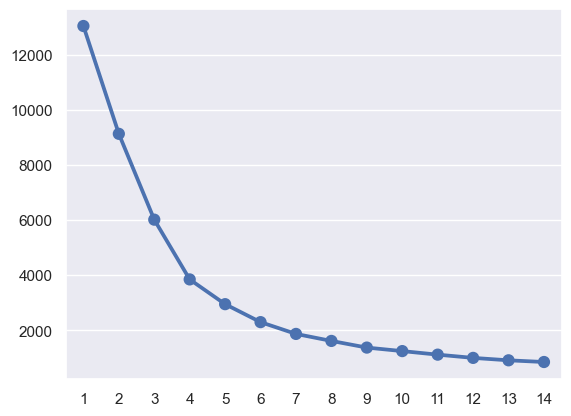

In [47]:
sns.pointplot(a, wcss)

In [48]:
KM = KMeans(n_clusters=4, init='k-means++', max_iter=1000, random_state=1)
y_kmeans = KM.fit_predict(scaled_data)
y_kmeans

array([0, 0, 0, ..., 0, 3, 0])

In [51]:
RFMScores['Cluster'] = KM.labels_

In [52]:
RFMScores

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMScore,Loyality_Lavel,Cluster
0,2.0,4,63,553704.0,1,1,1,111,3,Diamond,0
1,3.0,77,18,257404.0,3,2,1,321,6,Gold,0
2,4.0,19,10,176613.0,2,3,2,232,7,Gold,0
3,5.0,311,7,41976.0,4,4,3,443,11,Silver,2
4,6.0,37,42,151822.0,2,1,2,212,5,Diamond,0
...,...,...,...,...,...,...,...,...,...,...,...
4344,4368.0,278,7,20480.0,4,4,4,444,12,Silver,2
4345,4369.0,181,6,10774.0,4,4,4,444,12,Silver,2
4346,4370.0,9,11,24962.0,1,3,4,134,8,Gold,0
4347,4371.0,4,132,280608.0,1,1,1,111,3,Diamond,3


In [53]:
# Look at the centroid per cluster
centroid_df = RFMScores.groupby('Cluster')[['Recency','Frequency','Monetory','CustomerID']].agg({
    'Recency' :'mean', 'Frequency' : 'mean','Monetory' : 'mean', 'CustomerID' : 'nunique'}).reset_index()

In [55]:
centroid_df = centroid_df.rename(columns = {'CustomerID' : 'NumBuyers'} )
centroid_df

,Cluster,Recency,Frequency,Monetory,NumBuyers
0,0,45.953103,22.735517,1.494557e+05,2900
1,1,6.416667,213.500000,1.262704e+07,12
2,2,250.514981,9.932584,5.586116e+04,1068
3,3,13.192412,108.523035,9.631295e+05,369


In [56]:
# Look at the centroid per cluster
centroid_df_1 = RFMScores.groupby('Loyality_Lavel')[['Recency','Frequency','Monetory','CustomerID']].agg({
    'Recency' :'sum', 'Frequency' : 'sum','Monetory' : 'sum', 'CustomerID' : 'nunique'}).reset_index()

In [57]:
centroid_df_1 = centroid_df_1.rename(columns = {'CustomerID' : 'NumBuyers'} )

In [58]:
centroid_df_1

,Loyality_Lavel,Recency,Frequency,Monetory,NumBuyers
0,Diamond,25884,79044,766373539.0,1288
1,Gold,80608,25588,163027057.0,1279
2,Platinum,103130,8867,48534217.1,910
3,Silver,196137,5649,22065534.0,872


In [60]:
centroid_df_1['Percent'] = round(centroid_df_1['NumBuyers']/centroid_df_1.NumBuyers.sum()*100,2)

In [61]:
centroid_df_1

,Loyality_Lavel,Recency,Frequency,Monetory,NumBuyers,Percent
0,Diamond,25884,79044,766373539.0,1288,29.62
1,Gold,80608,25588,163027057.0,1279,29.41
2,Platinum,103130,8867,48534217.1,910,20.92
3,Silver,196137,5649,22065534.0,872,20.05


In [62]:
# https://plotly.com/ - Please explore this
# squarify
# !pip install squarify
import squarify

In [63]:
centroid_df_2 = centroid_df_1[['Loyality_Lavel','NumBuyers','Percent']]
centroid_df_2

,Loyality_Lavel,NumBuyers,Percent
0,Diamond,1288,29.62
1,Gold,1279,29.41
2,Platinum,910,20.92
3,Silver,872,20.05


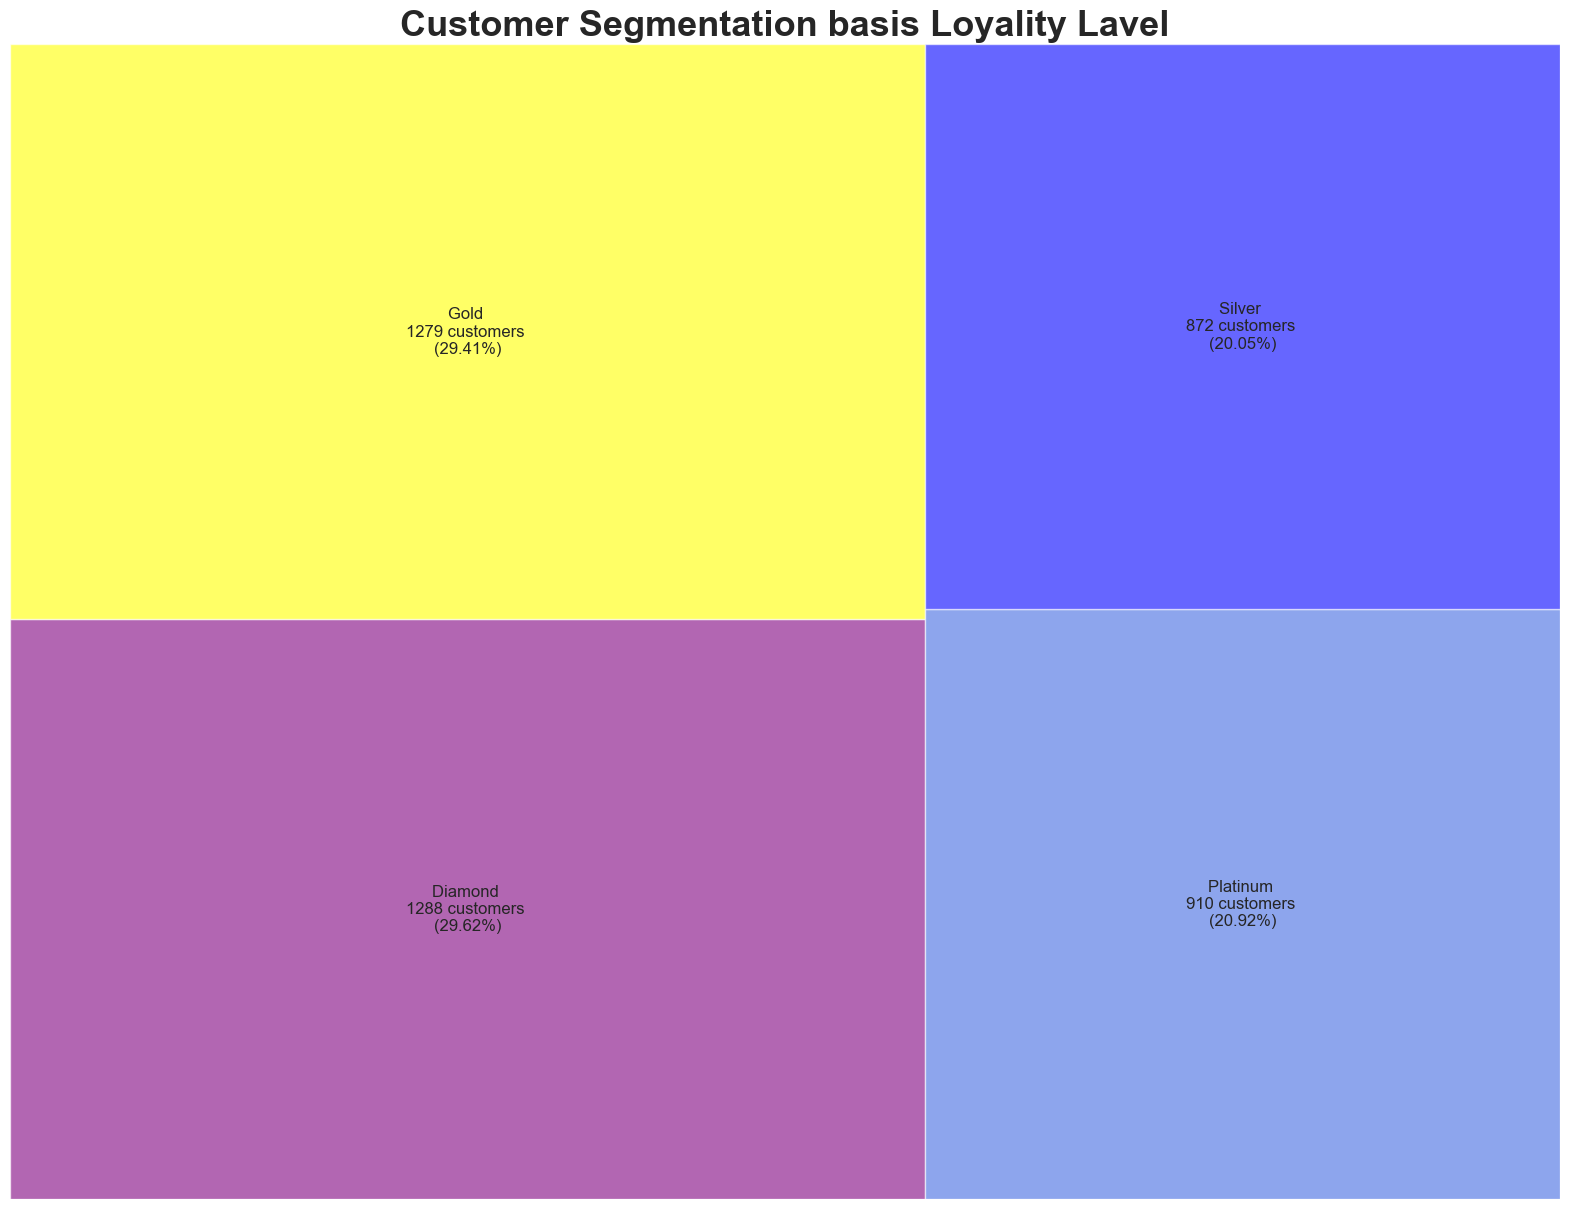

In [66]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20,15)
colors_dics = {'Diamond':'Purple', 'Gold':'yellow','Platinum':'royalblue','Silver':'blue'}
squarify.plot(sizes=centroid_df_2['NumBuyers'], color = colors_dics.values(),
             label = ['{} \n{:.0f} customers \n({}%)'.format(*centroid_df_2.iloc[i]) 
                      for i in range(0,len(centroid_df_1))],alpha=0.6)

plt.title("Customer Segmentation basis Loyality Lavel", fontsize=26, fontweight='bold')
plt.axis('off')
plt.show()

In [67]:
# Hierarchical cluster
from scipy.cluster.hierarchy import dendrogram, linkage

In [69]:
import scipy.cluster.hierarchy as sch

In [ ]:
h_cluster = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customerid')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(scaled_data)